# **PROYECTO DE ANALISIS DE VENTAS DE UNA TIENDA MINORISTA.**

🔍 Preguntas de Análisis de Datos (Descriptivo y Diagnóstico)
1. **Rendimiento de ventas**

  ¿Cuál es la línea de producto más vendida por ciudad o sucursal?
  
  ¿Qué día o mes se genera el mayor volumen de ventas?

  ¿Qué ciudad genera más ingresos brutos o tiene mayor margen?

2. **Análisis de clientes**

  ¿Qué perfil de cliente (nuevo vs. recurrente) gasta más?

  ¿Hay diferencias significativas en las compras entre géneros?

  ¿Qué método de pago es el más utilizado por ciudad?

3. **Eficiencia operativa**

   ¿Cuál es el margen promedio por producto y ciudad?

   ¿Qué líneas de producto tienen menor rentabilidad?

   ¿Cuál es el ticket promedio por tipo de cliente?

# **Lectura de Datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reemplaza 'tu_dataset.csv' con la ruta a tu archivo de dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Muestra las primeras filas del dataframe
display(df.head())

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

,OrderID,OrderDate,Branch,City,CustomerType,Gender,ProductLine,UnitPrice,Quantity,Payment,Total,COGS,GrossIncome,GrossMargin%,Rating
0,ORD1000,2024-01-01,C,Guadalajara,New,Female,Audio,1301.83,2,Cash,2603.66,1955.02,648.64,24.91,6.1
1,ORD1001,2024-01-02,A,Guadalajara,New,Male,Laptop,802.67,2,Cash,1605.34,1205.41,399.93,24.91,7.9
2,ORD1002,2024-01-03,C,Monterrey,New,Female,Accessories,744.81,4,Cash,2979.24,2237.03,742.21,24.91,4.7
3,ORD1003,2024-01-04,C,Guadalajara,New,Female,Gaming,87.18,3,Cash,261.54,196.38,65.16,24.91,9.3
4,ORD1004,2024-01-05,A,Mexico City,Returning,Male,Smartphone,544.81,3,Cash,1634.43,1227.25,407.18,24.91,7.0


In [ ]:
# Informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       500 non-null    object 
 1   OrderDate     500 non-null    object 
 2   Branch        500 non-null    object 
 3   City          500 non-null    object 
 4   CustomerType  500 non-null    object 
 5   Gender        500 non-null    object 
 6   ProductLine   500 non-null    object 
 7   UnitPrice     500 non-null    float64
 8   Quantity      500 non-null    int64  
 9   Payment       500 non-null    object 
 10  Total         500 non-null    float64
 11  COGS          500 non-null    float64
 12  GrossIncome   500 non-null    float64
 13  GrossMargin%  500 non-null    float64
 14  Rating        500 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 58.7+ KB


In [ ]:
len(df)

500

# **Limpieza de Datos.**

In [ ]:
# Identificacion de valores nulos
df.isnull().sum()

,0
OrderID,0
OrderDate,0
Branch,0
City,0
CustomerType,0
Gender,0
ProductLine,0
UnitPrice,0
Quantity,0
Payment,0


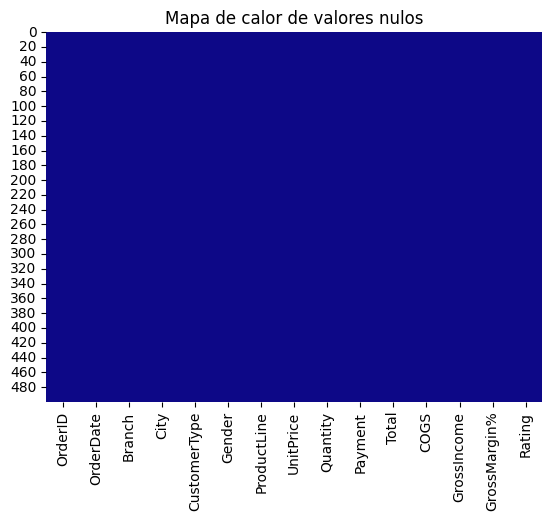

In [ ]:
# Mapa de calor de valores nulos
# Crea un mapa de calor de los valores nulos
sns.heatmap(df.isnull(), cbar=False, cmap='plasma')

# Muestra el mapa de calor
plt.title('Mapa de calor de valores nulos')
plt.show()

Se aceptan valores duplicados

In [ ]:
# Identificar outliers utilizando el método IQR
# Seleccionar solo las columnas numéricas para identificar outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular el rango intercuartílico (IQR) para cada columna num
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear un filtro para identificar los outliers (filas que tienen al menos un outlier)
outlier_filter = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)
outlier_rows = df[outlier_filter.any(axis=1)]

print("Filas con outliers:")
display(outlier_rows)


Filas con outliers:


,OrderID,OrderDate,Branch,City,CustomerType,Gender,ProductLine,UnitPrice,Quantity,Payment,Total,COGS,GrossIncome,GrossMargin%,Rating
77,ORD1077,2024-03-18,C,Guadalajara,New,Male,Gaming,84.28,1,Credit Card,84.28,63.28,21.00,24.92,6.5
98,ORD1098,2024-04-08,A,Monterrey,Returning,Female,Accessories,165.16,1,Ewallet,165.16,124.01,41.15,24.92,6.2
155,ORD1155,2024-06-04,C,Guadalajara,New,Male,Audio,177.08,1,Ewallet,177.08,132.96,44.12,24.92,9.7
471,ORD1471,2025-04-16,B,Mexico City,New,Male,TV,85.08,1,Ewallet,85.08,63.88,21.20,24.92,5.6


# **Estadisticas Descriptivas**

In [ ]:
# Estadisticas descriptivas
df.describe()

,UnitPrice,Quantity,Total,COGS,GrossIncome,GrossMargin%,Rating
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,771.576080,2.568000,2010.728820,1509.802560,500.92626,24.910080,6.986200
std,416.609207,1.124235,1460.680167,1096.785766,363.89440,0.000892,1.747724
min,54.670000,1.000000,60.970000,45.780000,15.19000,24.910000,4.000000
25%,399.555000,2.000000,818.462500,614.565000,203.89750,24.910000,5.600000
50%,790.690000,3.000000,1641.730000,1232.730000,409.00000,24.910000,7.000000
75%,1119.307500,4.000000,2989.970000,2245.087500,744.88250,24.910000,8.500000
max,1497.600000,4.000000,5954.520000,4471.090000,1483.43000,24.920000,10.000000


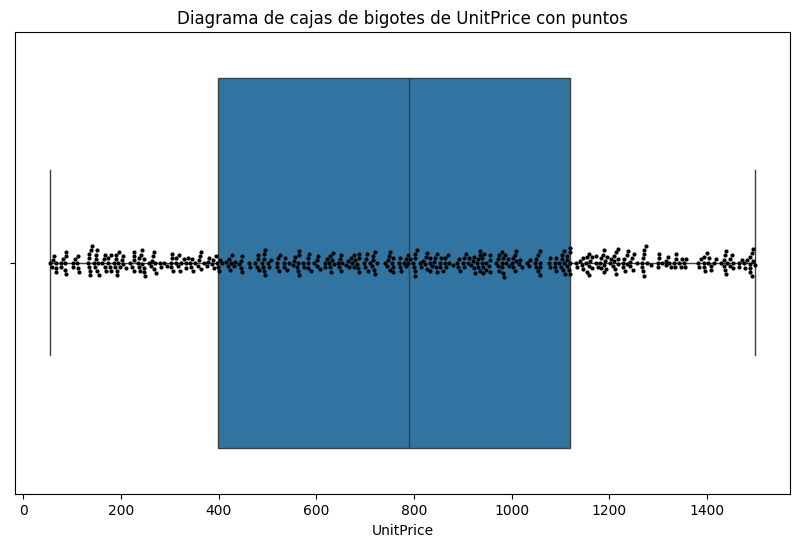

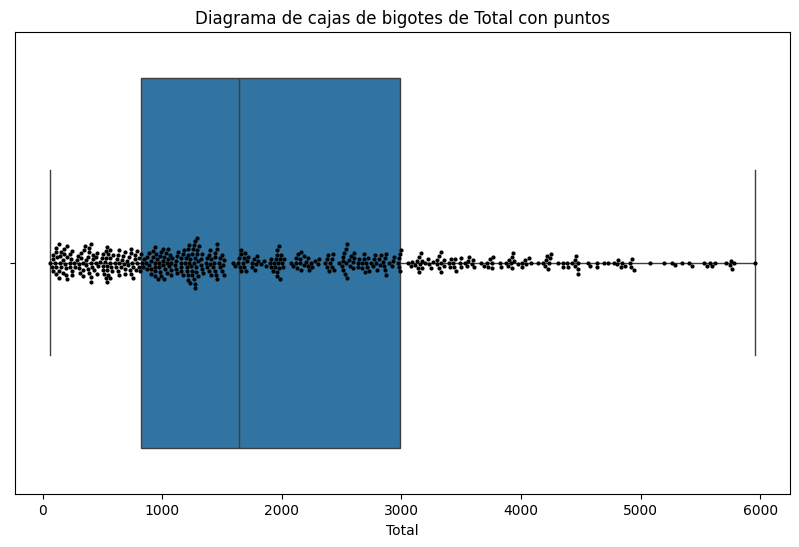

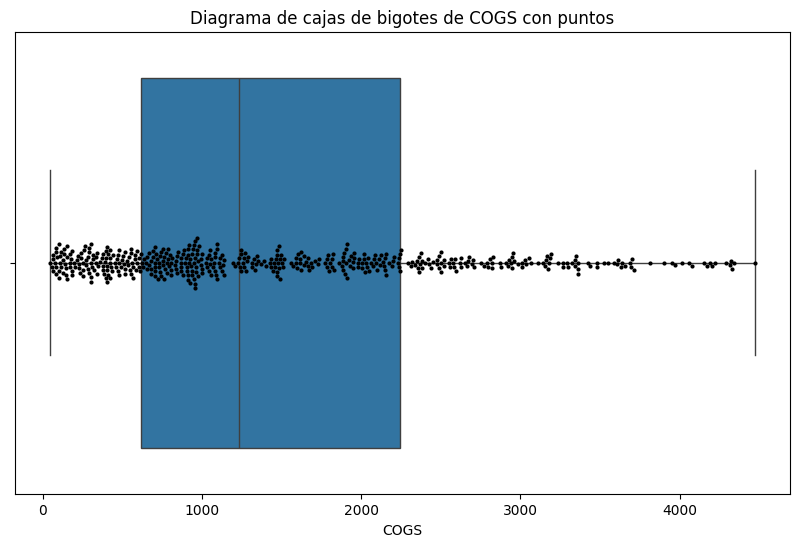

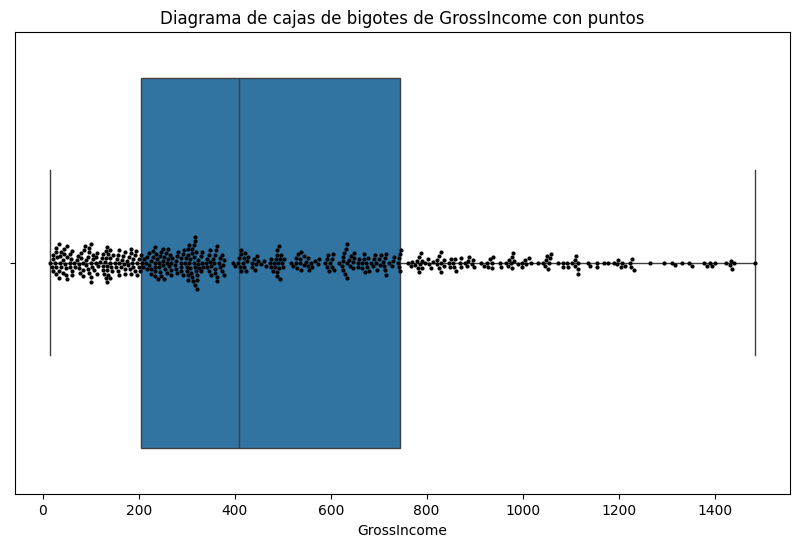

In [ ]:
# Diagrama de cajas de bigotes de UnitPrice con puntos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['UnitPrice'])
sns.swarmplot(x=df['UnitPrice'], color='black', size=3) # Agrega los puntos individuales
plt.title('Diagrama de cajas de bigotes de UnitPrice con puntos')
plt.show()

# Diagrama de cajas de bigotes de Total con puntos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total'])
sns.swarmplot(x=df['Total'], color='black', size=3) # Agrega los puntos individuales
plt.title('Diagrama de cajas de bigotes de Total con puntos')
plt.show()

# Diagrama de cajas de bigotes de COGS con puntos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['COGS'])
sns.swarmplot(x=df['COGS'], color='black', size=3) # Agrega los puntos individuales
plt.title('Diagrama de cajas de bigotes de COGS con puntos')
plt.show()

# Diagrama de cajas de bigotes de GrossIncome con puntos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GrossIncome'])
sns.swarmplot(x=df['GrossIncome'], color='black', size=3) # Agrega los puntos individuales
plt.title('Diagrama de cajas de bigotes de GrossIncome con puntos')
plt.show()


Las variables de medida no contiene datos atipicos.

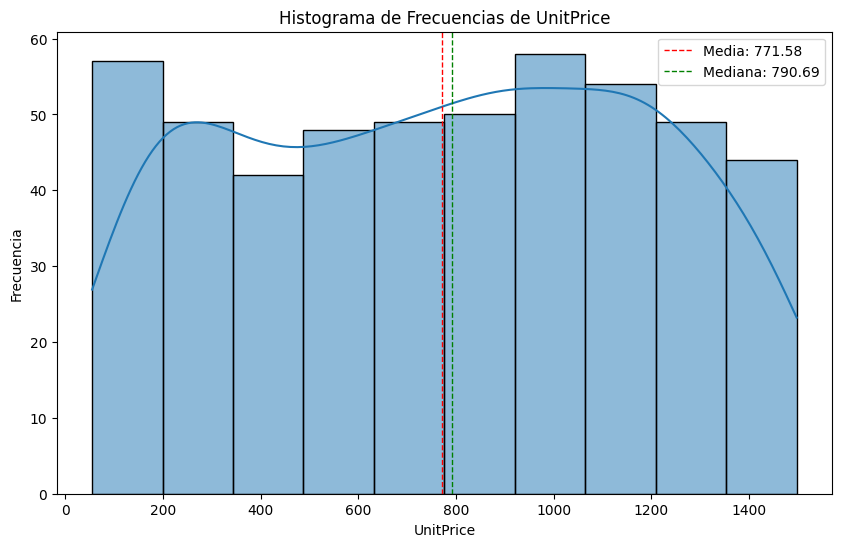

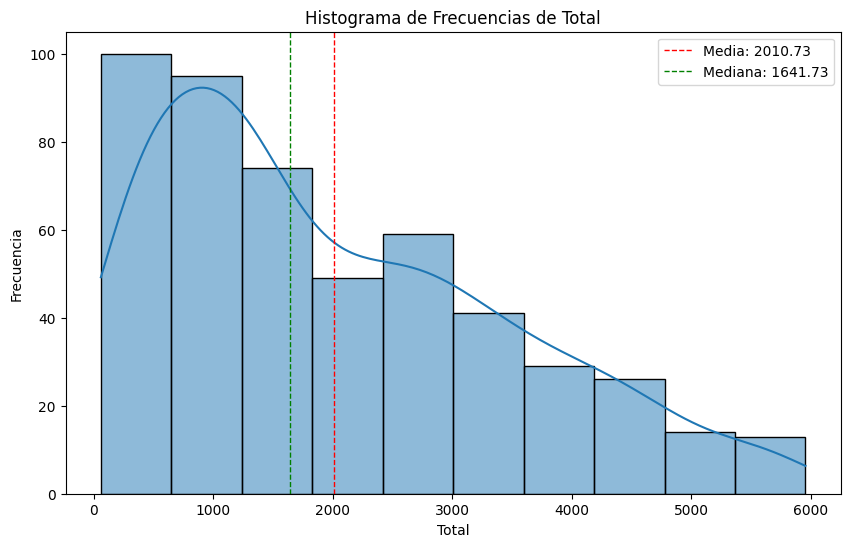

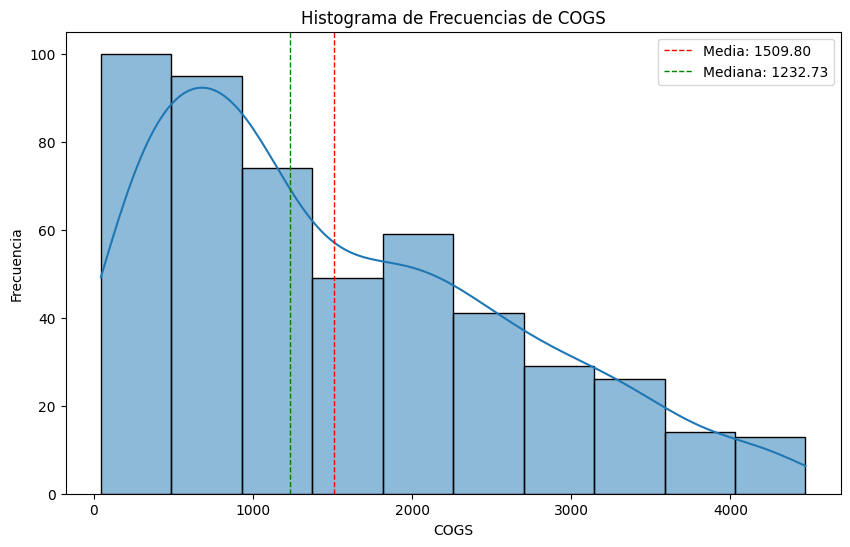

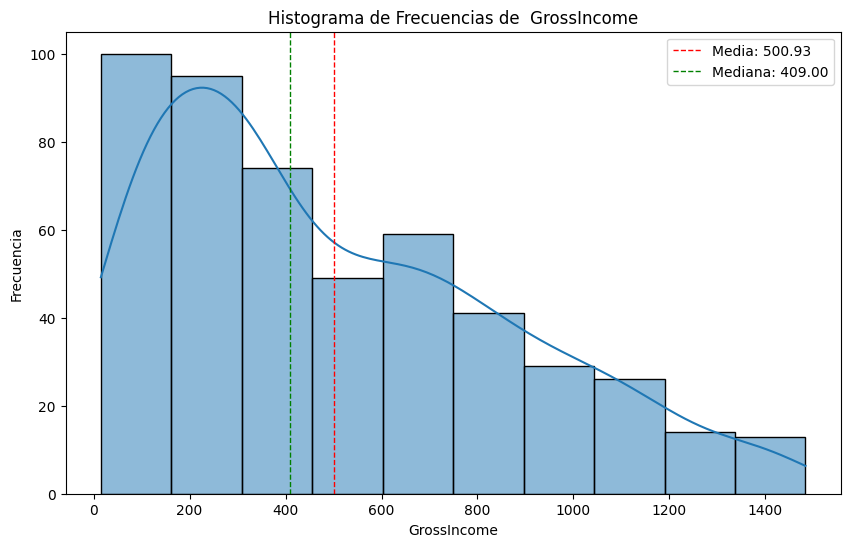

In [ ]:
# Histograma de frecuencias UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=10, kde=True)
plt.title('Histograma de Frecuencias de UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frecuencia')

# Agregar lineas de media y mediana
plt.axvline(df['UnitPrice'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Media: {df["UnitPrice"].mean():.2f}')
plt.axvline(df['UnitPrice'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {df["UnitPrice"].median():.2f}')
plt.legend()

plt.show()


# Histograma de frecuencias Total
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=10, kde=True)
plt.title('Histograma de Frecuencias de Total')
plt.xlabel('Total')
plt.ylabel('Frecuencia')

# Agregar lineas de media y mediana
plt.axvline(df['Total'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Media: {df["Total"].mean():.2f}')
plt.axvline(df['Total'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {df["Total"].median():.2f}')
plt.legend()

plt.show()


# Histograma de frecuencias COGS
plt.figure(figsize=(10, 6))
sns.histplot(df['COGS'], bins=10, kde=True)
plt.title('Histograma de Frecuencias de COGS')
plt.xlabel('COGS')
plt.ylabel('Frecuencia')

# Agregar lineas de media y mediana
plt.axvline(df['COGS'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Media: {df["COGS"].mean():.2f}')
plt.axvline(df['COGS'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {df["COGS"].median():.2f}')
plt.legend()

plt.show()

# Histograma de frecuencias  GrossIncome
plt.figure(figsize=(10, 6))
sns.histplot(df['GrossIncome'], bins=10, kde=True)
plt.title('Histograma de Frecuencias de  GrossIncome')
plt.xlabel('GrossIncome')
plt.ylabel('Frecuencia')

# Agregar lineas de media y mediana
plt.axvline(df['GrossIncome'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Media: {df["GrossIncome"].mean():.2f}')
plt.axvline(df['GrossIncome'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {df["GrossIncome"].median():.2f}')
plt.legend()

plt.show()

# **Analisis de Correlaciones**

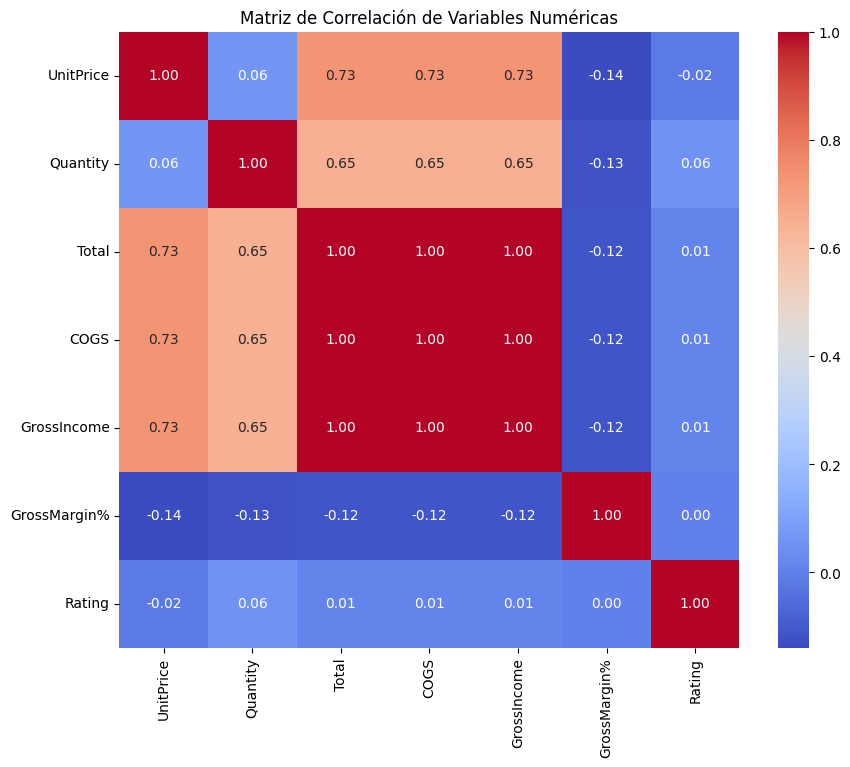

In [ ]:
# Matriz de Correlación
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# **Rendimento de ventas**

# ¿Cuál es la línea de producto más vendida por ciudad?

In [ ]:
# Agrupar por ciudad y línea de producto, y contar las ventas
product_sales_by_city = df.groupby(['City', 'ProductLine']).size().reset_index(name='SalesCount')

# Encontrar la línea de producto más vendida por ciudad
most_sold_product_per_city = product_sales_by_city.loc[product_sales_by_city.groupby('City')['SalesCount'].idxmax()]

# Crear un gráfico de barras interactivo con Plotly Express
fig = px.bar(most_sold_product_per_city,
             x='City',
             y='SalesCount',
             color='ProductLine',
             title='Línea de Producto Más Vendida por Ciudad')
fig.show()

In [ ]:
# Agrupar por ciudad y línea de producto, y calcular las ventas totales
product_total_sales_by_city = df.groupby(['City', 'ProductLine'])['Total'].sum().reset_index()

# Crear un gráfico de barras interactivo con Plotly Express
fig = px.bar(product_total_sales_by_city,
             x='ProductLine',
             y='Total',
             color='City',
             title='Ventas Totales por Línea de Producto y Ciudad',
             barmode='group') # Use 'group' to group bars by city

fig.show()

# ¿Qué día o mes se genera el mayor volumen de ventas?

In [ ]:
import plotly.express as px

# Convertir 'OrderDate' a formato datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extraer el mes y el día de la semana
df['Month'] = df['OrderDate'].dt.month_name()
df['DayOfWeek'] = df['OrderDate'].dt.day_name()

# Calcular el volumen de ventas por mes
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()

# Ordenar por volumen de ventas para mejor visualización
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')


# Crear gráfico de barras para ventas mensuales
fig_month = px.bar(monthly_sales,
                   x='Month',
                   y='Total',
                   title='Volumen de Ventas por Mes')


fig_month.show()


# Calcular el volumen de ventas por día de la semana
daily_sales = df.groupby('DayOfWeek')['Total'].sum().reset_index()

# Ordenar por volumen de ventas para mejor visualización (opcional, pero útil)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['DayOfWeek'] = pd.Categorical(daily_sales['DayOfWeek'], categories=day_order, ordered=True)
daily_sales = daily_sales.sort_values('DayOfWeek')


# Crear gráfico de barras para ventas diarias
fig_day = px.bar(daily_sales,
                 x='DayOfWeek',
                 y='Total',
                 title='Volumen de Ventas por Día de la Semana')

fig_day.show()

In [ ]:
import plotly.express as px

# Convertir 'OrderDate' a formato datetime si aún no está
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extraer el mes y el día de la semana
df['Month'] = df['OrderDate'].dt.month_name()
df['DayOfWeek'] = df['OrderDate'].dt.day_name()

# Calcular el volumen de ventas por mes
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()

# Ordenar por volumen de ventas para mejor visualización
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('Month')

# Crear gráfico de línea para ventas mensuales
fig_month = px.line(monthly_sales,
                   x='Month',
                   y='Total',
                   title='Tendencia de Volumen de Ventas por Mes')

fig_month.show()

# Calcular el volumen de ventas por día de la semana
daily_sales = df.groupby('DayOfWeek')['Total'].sum().reset_index()

# Ordenar por volumen de ventas para mejor visualización
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['DayOfWeek'] = pd.Categorical(daily_sales['DayOfWeek'], categories=day_order, ordered=True)
daily_sales = daily_sales.sort_values('DayOfWeek')

# Crear gráfico de línea para ventas diarias
fig_day = px.line(daily_sales,
                 x='DayOfWeek',
                 y='Total',
                 title='Tendencia de Volumen de Ventas por Día de la Semana')

fig_day.show()

# ¿Qué ciudad genera más ingresos brutos o tiene mayor margen?

In [ ]:
# Agrupar por ciudad y calcular el total de Gross Income y el promedio de Gross Margin
city_performance = df.groupby('City').agg(
    GrossIncomeTotal=('GrossIncome', 'sum'),
    GrossMarginAverage=('GrossMargin%', 'mean')
).reset_index()

# Encontrar la ciudad con el mayor ingreso bruto
city_highest_income = city_performance.loc[city_performance['GrossIncomeTotal'].idxmax()]

print("Ciudad con el mayor ingreso bruto:")
display(city_highest_income)

# Crear un gráfico de barras interactivo para Gross Income por ciudad
fig_income = px.bar(city_performance,
                    x='City',
                    y='GrossIncomeTotal',
                    title='Ingresos Brutos por Ciudad')
fig_income.show()


Ciudad con el mayor ingreso bruto:


,1
City,Mexico City
GrossIncomeTotal,92981.19
GrossMarginAverage,24.910053


# **Análisis de clientes**

# ¿Qué perfil de cliente (nuevo vs. recurrente) gasta más?

In [ ]:
# Group by CustomerType and calculate the total purchases
customer_spending_type = df.groupby('CustomerType')['Total'].sum().reset_index()

# Create an interactive pie chart with Plotly Express
fig = px.pie(customer_spending_type,
             values='Total',
             names='CustomerType',
             title='Total Purchases by Customer Type')
fig.show()

In [ ]:
# Group by CustomerType and City and calculate the total purchases
customer_spending = df.groupby(['CustomerType', 'City'])['Total'].sum().reset_index()

# Create an interactive bar chart with Plotly Express
fig = px.bar(customer_spending,
             x='CustomerType',
             y='Total',
             color='City',
             title='Total compras por perfil de cliente por ciudad',
             barmode='group') # Use 'group' to group bars by city

fig.show()

# ¿Hay diferencias significativas en las compras entre géneros?

In [ ]:
# Que género compra mas
# Calcula el genero y calcula el total de compras
gender_spending = df.groupby('Gender')['Total'].sum().reset_index()

# Crea grafica interactiva de barras horizontal con Plotly Express
fig = px.bar(gender_spending,
             x='Total',  # Swap x and y for horizontal bars
             y='Gender',
             title='Total compras por género')
fig.show()

In [ ]:
# Que linea de producto compra mas cada género
import plotly.graph_objects as go

# Agrupa genero y linea de producto y calcula el total de ventas.
sales_heatmap_data = df.groupby(['Gender', 'ProductLine'])['Total'].sum().reset_index()

# Create a heatmap with Plotly Graph Objects
fig = go.Figure(data=go.Heatmap(
    x=sales_heatmap_data['ProductLine'],
    y=sales_heatmap_data['Gender'],
    z=sales_heatmap_data['Total'],
    colorscale='Viridis'))

fig.update_layout(
    title='Total ventas por linea de producto por género',
    xaxis_title='Product Line',
    yaxis_title='Gender'
)

fig.show()

In [ ]:
# Que género compra mas cada ciudad
# Agrupar genero y ciudad
gender_sales_by_city = df.groupby(['Gender', 'City'])['Total'].sum().reset_index()

# Crea una grafica intercativa con Plotly Express
fig = px.bar(gender_sales_by_city,
             x='City',
             y='Total',
             color='Gender',
             title='Total Compras por género por ciudad',
             barmode='group')

fig.show()

# ¿Qué método de pago es el más utilizado por ciudad?

In [ ]:
# Agrupar ciudad por metodo de pago
payment_method_by_city = df.groupby(['City', 'Payment']).size().reset_index(name='Count')

# crea un grafico de barras con plotly express
fig = px.bar(payment_method_by_city,
             x='City',
             y='Count',
             color='Payment',
             title='Metodo de pago más utilizados por ciudad',
             barmode='group') # Usa el metodo group para agrupar los metodos de pago por ciudad

fig.show()

# **Eficiencia operativa**

In [ ]:
#¿Cuál es el margen promedio por producto y ciudad?
#¿Qué líneas de producto tienen menor rentabilidad?
#¿Cuál es el ticket promedio por tipo de cliente?

#¿Cuál es el margen promedio por producto y ciudad?

In [ ]:
# La columna 'GrossIncome' ya representa el margen bruto de cada venta.
# Podemos usar directamente esta columna para el análisis del margen promedio.

# Agrupar por Ciudad y Línea de Producto y calcular el promedio de GrossIncome (que es el margen bruto)
product_average_margin_amount_by_city = df.groupby(['City', 'ProductLine'])['GrossIncome'].mean().reset_index()

# Mostrar el DataFrame con el margen promedio calculado
#print("Margen Bruto Promedio por Línea de Producto y Ciudad (product_average_margin_amount_by_city):")
#display(product_average_margin_amount_by_city)

# Crear un gráfico de barras agrupado con Plotly Express
fig = px.bar(product_average_margin_amount_by_city,
             x='ProductLine',
             y='GrossIncome',
             color='City',
             title='Margen Bruto Promedio por Línea de Producto y Ciudad',
             barmode='group') # Usar 'group' para agrupar barras por ciudad

fig.show()

# ¿Qué líneas de producto tienen menor rentabilidad?

In [ ]:
# Calcular el ingreso bruto total para cada línea de producto
product_line_profitability = df.groupby('ProductLine')['GrossIncome'].sum().reset_index()

# Ordenar por ingreso bruto para ver fácilmente los más y menos rentables
product_line_profitability = product_line_profitability.sort_values('GrossIncome', ascending=False)

# Crear un gráfico de barras horizontal con Plotly Express
fig = px.bar(product_line_profitability,
             x='GrossIncome',  # Cambiar x por GrossIncome para barras horizontales
             y='ProductLine',  # Cambiar y por ProductLine para barras horizontales
             title='Rentabilidad por Línea de Producto (Ingreso Bruto Total)')

fig.show()

# ¿Cuál es el ticket promedio por tipo de cliente?

In [ ]:
# Calcular el ticket promedio por tipo de cliente
# Agrupar por 'CustomerType' y calcular el promedio de la columna 'Total'
average_ticket_by_customer_type = df.groupby('CustomerType')['Total'].mean().reset_index()

# Crear un gráfico de barras con Plotly Express
fig = px.bar(average_ticket_by_customer_type,
             x='CustomerType',
             y='Total',
             title='Ticket Promedio por Tipo de Cliente')

fig.show()